# Analyzing Gait data
- Ploting of Gait data(small sequences)
- Analysing the Fourier Transform for some of the Gait signals

In [10]:
# import tensorflow as tf
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [2]:
files1 = glob.glob("./parkinsons/*Co*.txt")
files2 = glob.glob("./parkinsons/*Pt*.txt")
files=files1+files2

In [3]:
columns = ["elaps_time","L1", "L2","L3","L4","L5","L6","L7","L8","R1","R2","R3","R4","R5","R6","R7","R8","LTot","RTot"]

In [4]:
def getClassForHealthyOrNot(filename):
    if (filename.find("Co") >=0):
        return 0
    else:
        return 1


In [5]:
class Patient:
    def __init__(self,input_data,y):
        self.x = input_data
        self.y = y
        self.x_scaled = input_data

In [34]:
l=[len(p.x) for p in patients]

In [35]:
np.average(l)

10841.666666666666

In [27]:
patients=[]
un_used_data=[]

for f in files:
    #print(f"{i+1}. {file}")
    
    data_txt = pd.read_table(f,names=columns)
    data_txt.drop(['elaps_time'],inplace=True,axis=1)

    j=0
    ispark = getClassForHealthyOrNot(f)
    # print(ispark)
    while j < 12001:
        data = data_txt.iloc[j+1:j+101,:]
        
        if data.shape[0] == 100:
            patients.append( Patient(data, ispark) )
        
        j=j+50

In [33]:
patients=[]
un_used_data=[]

for f in files:
    #print(f"{i+1}. {file}")
    
    data_txt = pd.read_table(f,names=columns)
    data_txt.drop(['elaps_time'],inplace=True,axis=1)

    j=0
    ispark = getClassForHealthyOrNot(f)
    # print(ispark)
    patients.append( Patient(data_txt, ispark) )
        

In [23]:
yf = scipy.fftpack.fft(np.array(patients[1].x['L8']))

In [24]:
np.array(patients[0].x['L7'])

array([87.23, 87.23, 87.23, ...,  2.97,  7.59, 28.93])

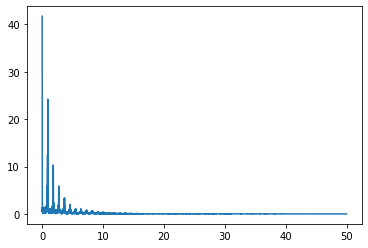

In [25]:
N = len(np.array(patients[0].x['L7']))
# sample spacing
T = 1.0 / 100.0
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [26]:
np.argmax(yf)

0

In [28]:
plt.rcParams["figure.figsize"] = (20,6)

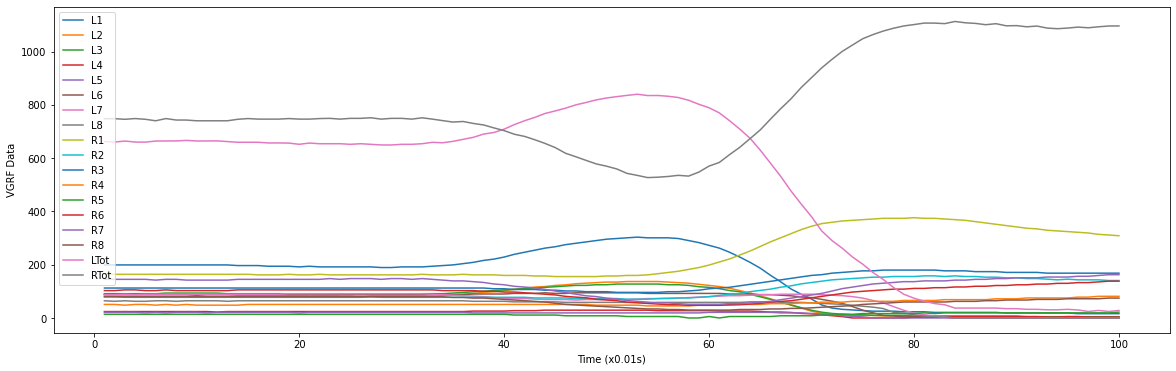

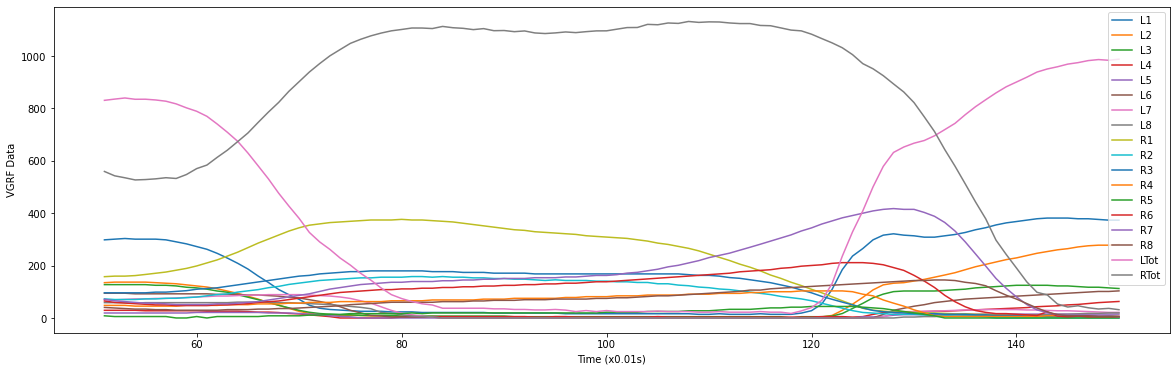

In [29]:
for i in range(2):
    
    for col in columns:
        if(col != 'elaps_time'):
            plt.plot(patients[i].x[col])
            plt.xlabel('Time (x0.01s)')
            plt.ylabel('VGRF Data')
    plt.legend(["L1", "L2","L3","L4","L5","L6","L7","L8","R1","R2","R3","R4","R5","R6","R7","R8","LTot","RTot"])
    plt.show()

<ipython-input-30-cb256de88e6c>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


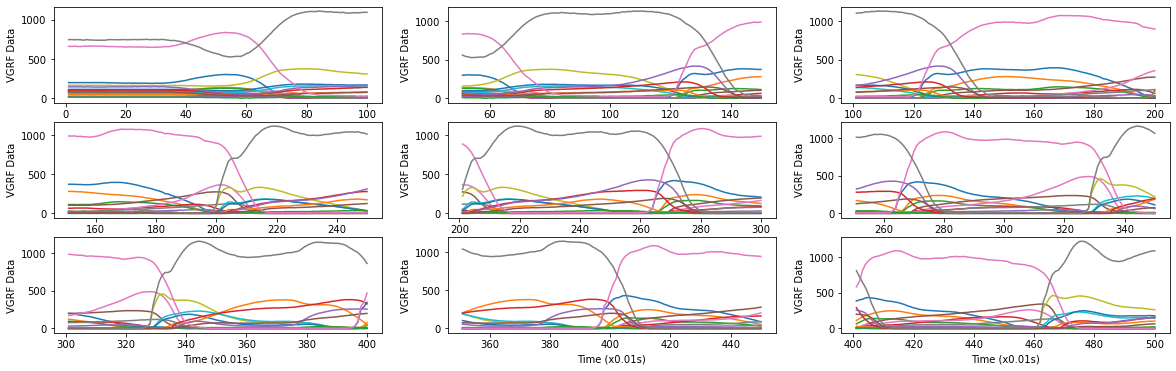

In [30]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    
    for col in columns:
        if(col != 'elaps_time'):
            ax[i//3,i%3].plot(patients[i].x[col])
#             ax[i//3,i%3].xlabel('Time (x0.01s)')
#             ax[i//3,i%3].ylabel('VGRF Data')
#     ax[i//3,i%3].legend(["L1", "L2","L3","L4","L5","L6","L7","L8","R1","R2","R3","R4","R5","R6","R7","R8","LTot","RTot"])

for axe in ax.flat:
    axe.set(xlabel='Time (x0.01s)', ylabel='VGRF Data')
fig.show()

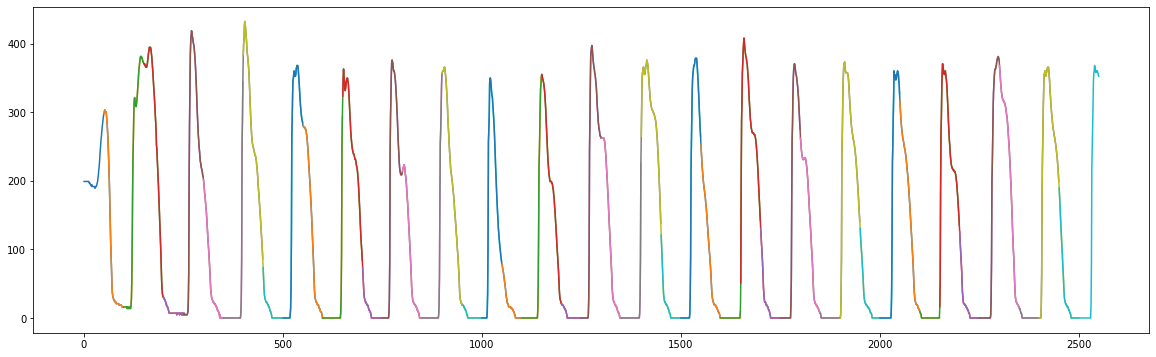

In [38]:
for j in range(50):
#     if(col != 'elaps_time'):
    plt.plot(patients[j].x['L1'])
plt.show()

In [12]:
patients=[]
for f in files1:
    data_txt = pd.read_table(f,names=columns)
    data_txt.drop(['elaps_time'],inplace=True,axis=1)
    j=0
    ispark = getClassForHealthyOrNot(f)
    # print(ispark)
    patients.append( Patient(data_txt, ispark) )
  

In [13]:
patients1=[]
for f in files2:
    data_txt = pd.read_table(f,names=columns)
    data_txt.drop(['elaps_time'],inplace=True,axis=1)
    j=0
    ispark = getClassForHealthyOrNot(f)
    # print(ispark)
    patients1.append( Patient(data_txt, ispark) )
  

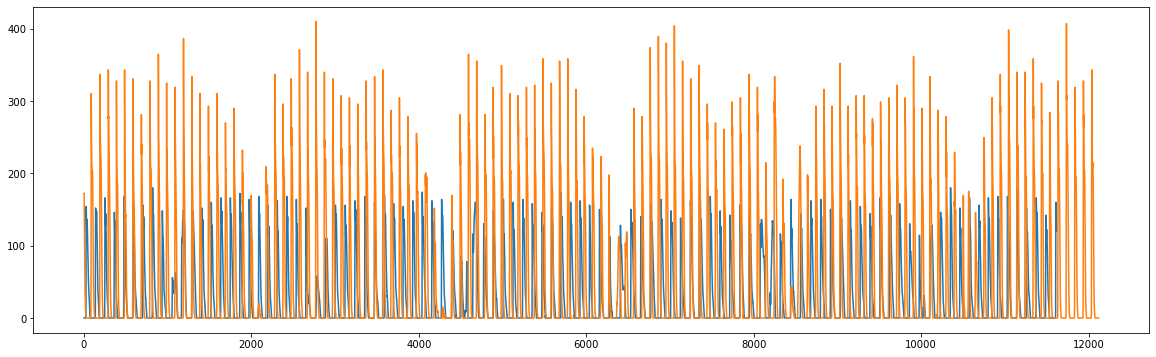

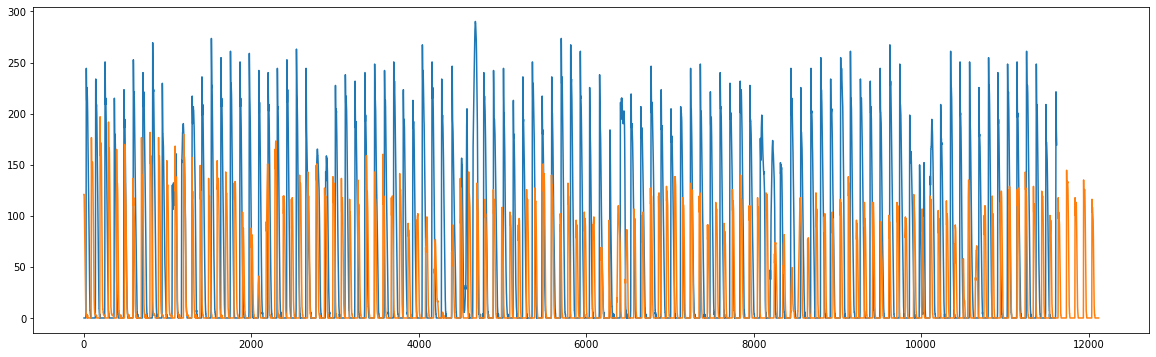

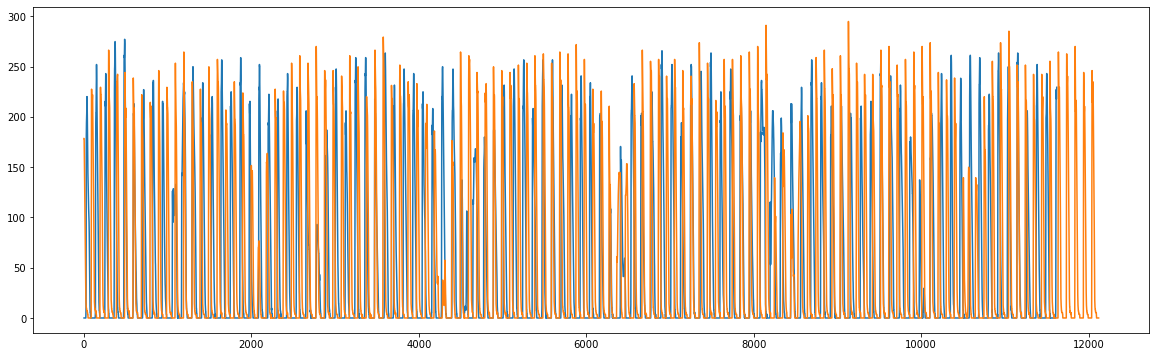

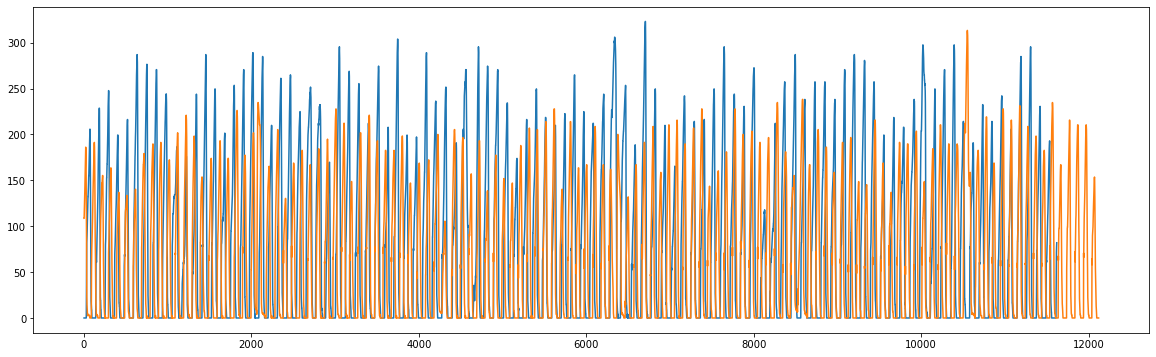

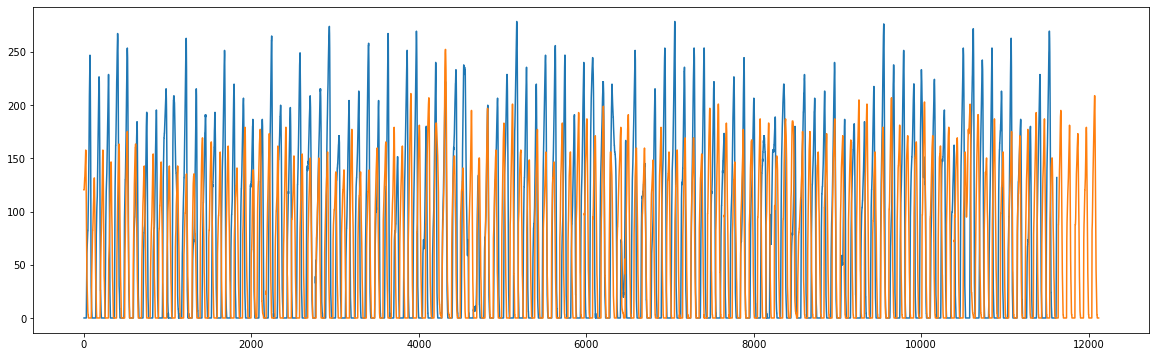

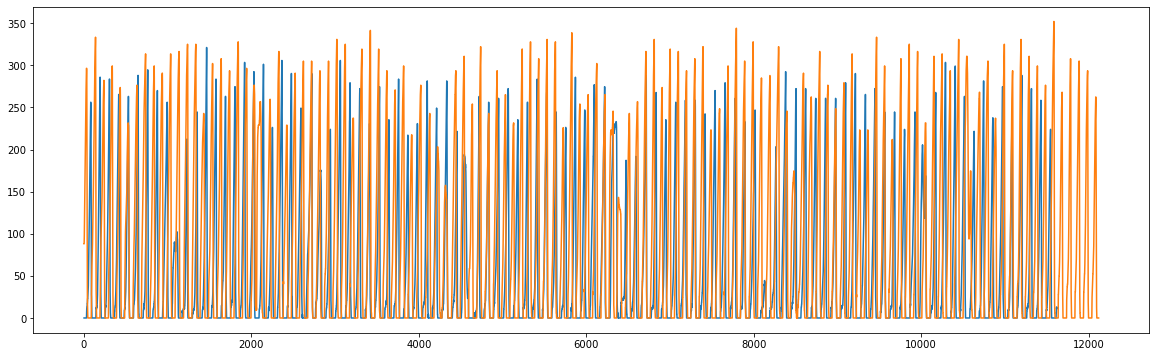

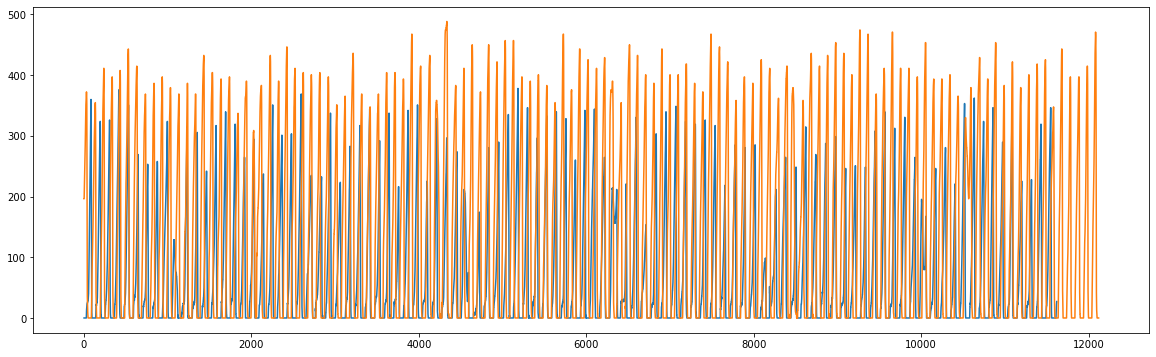

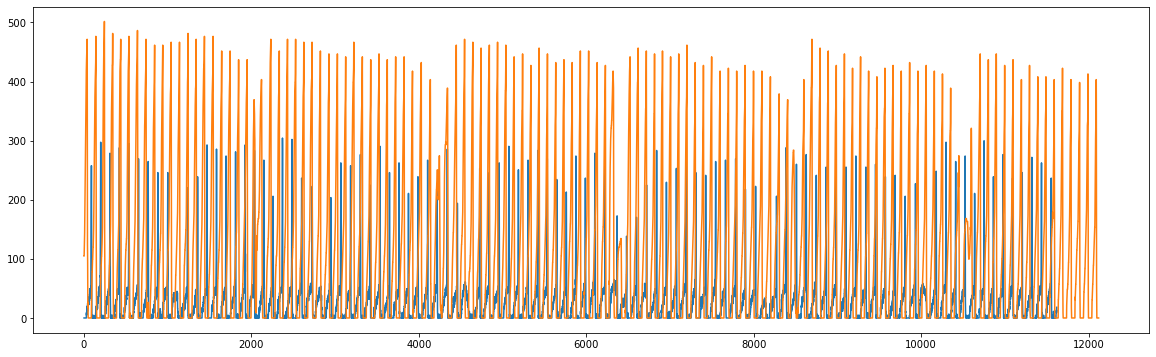

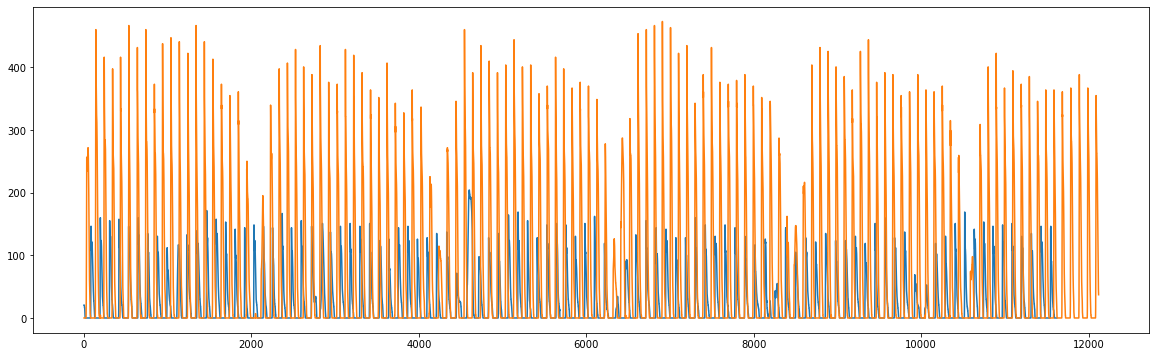

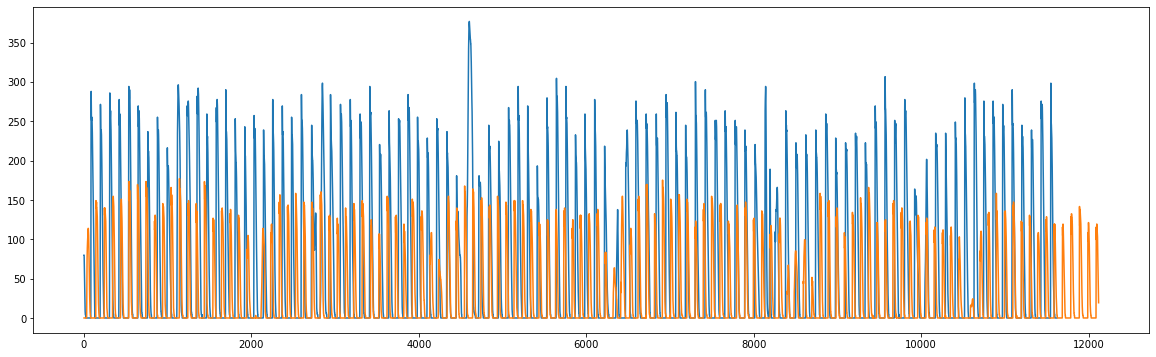

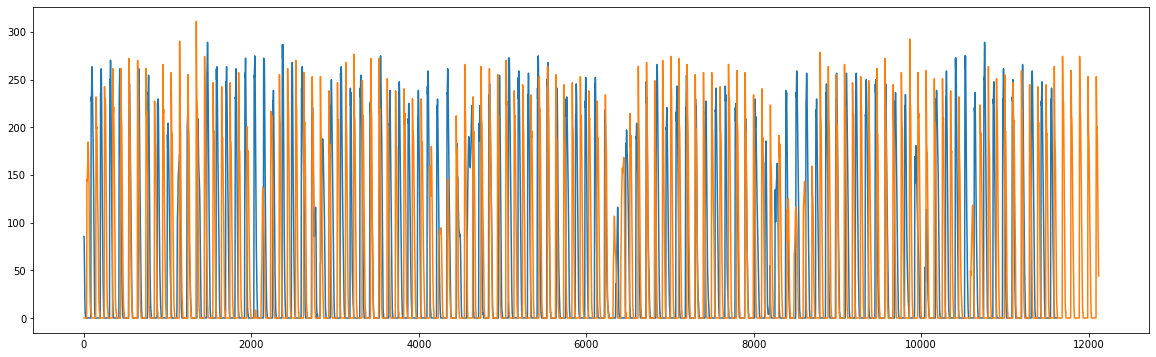

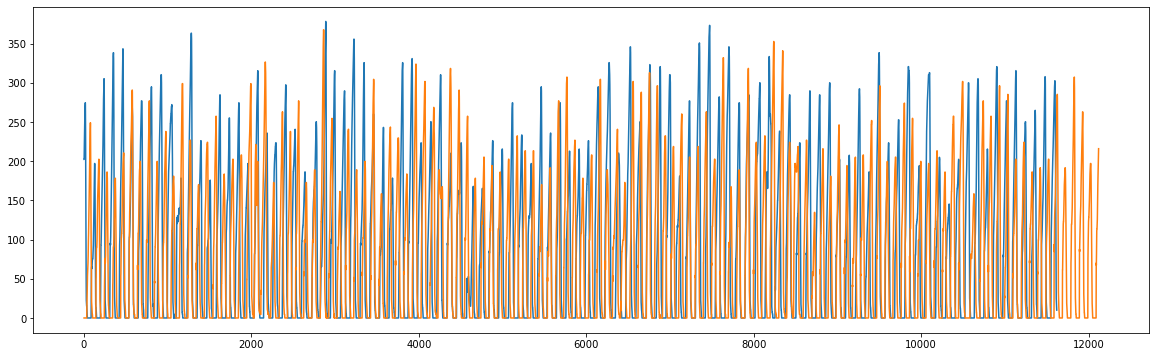

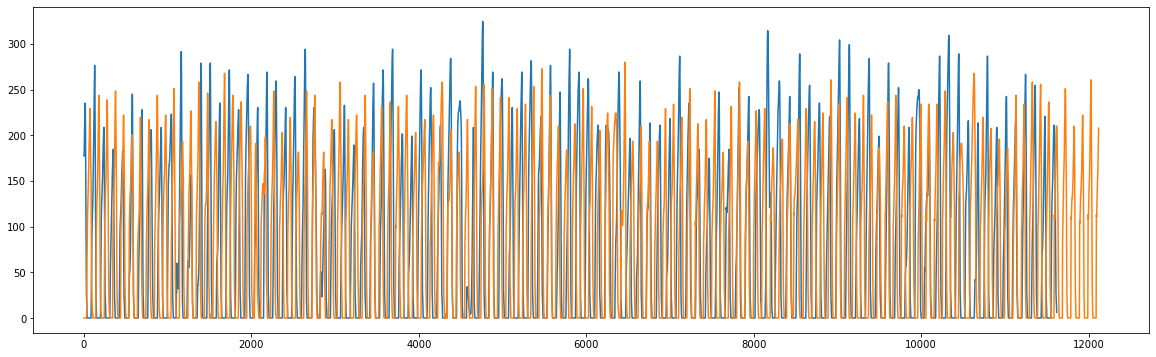

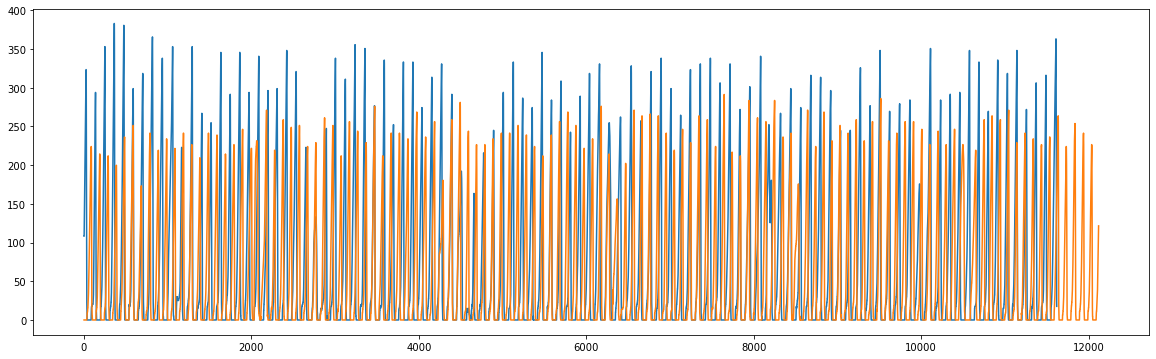

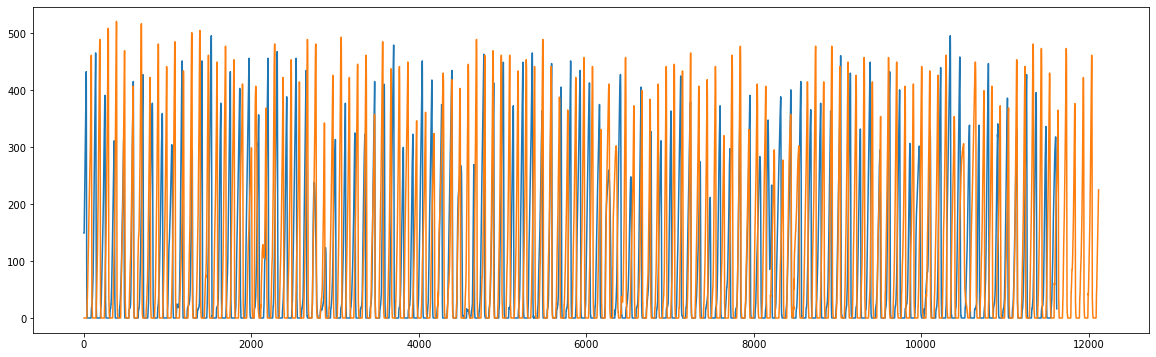

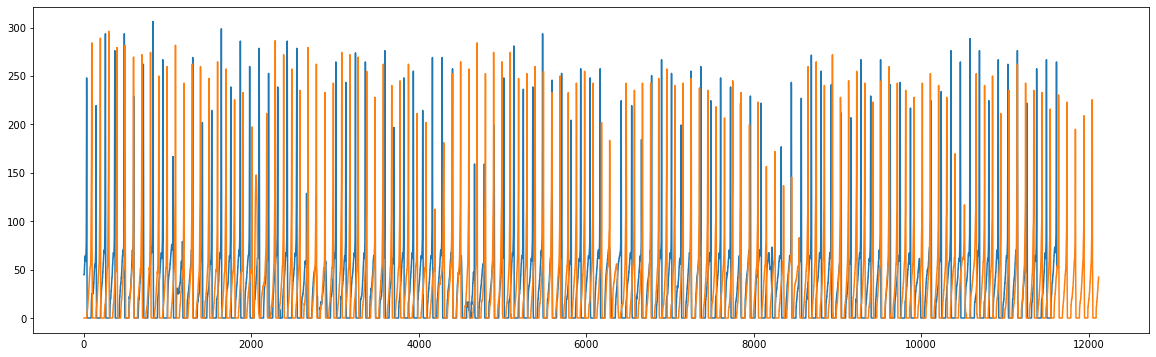

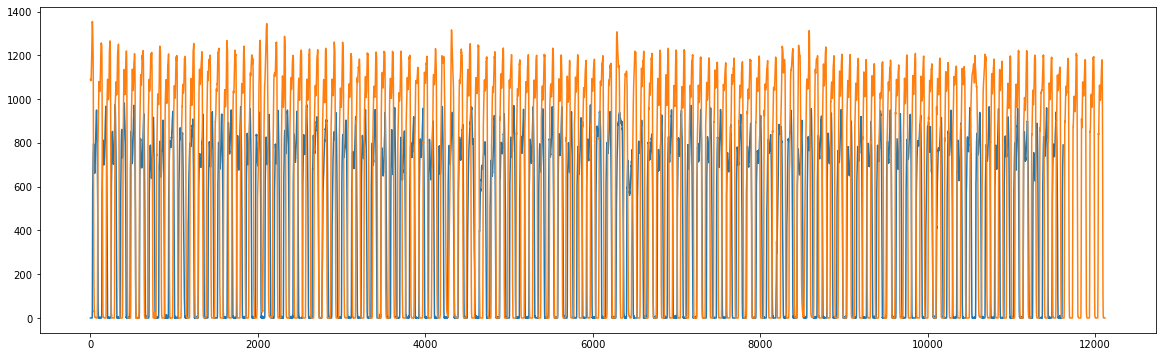

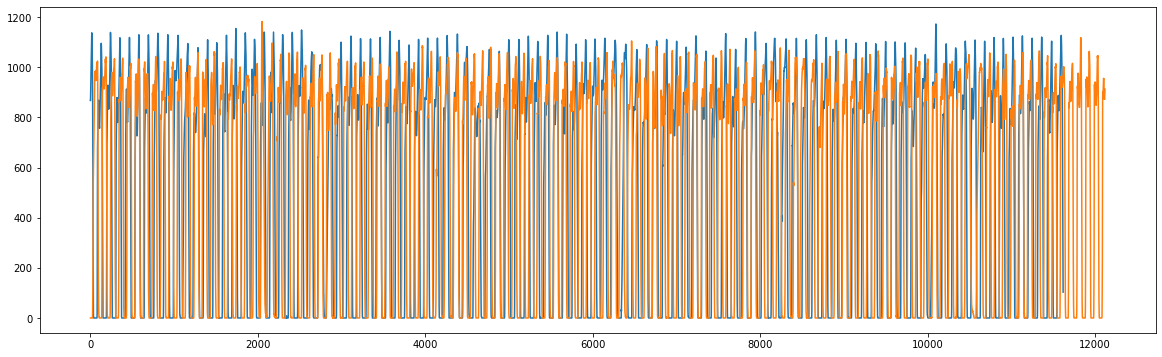

In [14]:
i=10
for col in columns:
    if(col != 'elaps_time'):
        plt.plot(patients[10].x[col])
        plt.plot(patients1[10].x[col])
    plt.show()


In [15]:
len(patients)

92

In [16]:
len(files)

306

In [17]:
co=[]
for i in range(len(patients)):
    for j in range(len(patients1)):
        tol=min(len(patients[i].x[col][:]),len(patients1[j].x[col][:]))
        co.append(np.abs(np.corrcoef(patients[i].x[col][:tol],patients1[j].x[col][:tol])[1][0]))

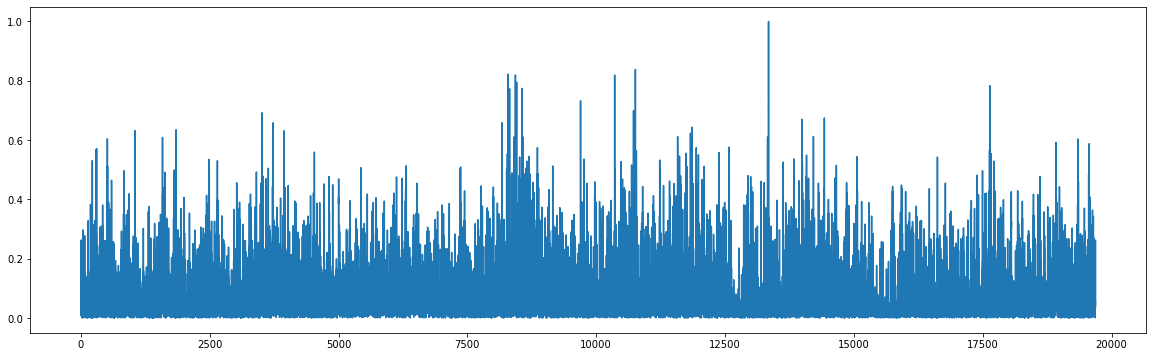

In [18]:
plt.plot(co)

In [19]:
fp=[]
for col in columns:
    if(col!='elaps_time'):
        fp.append(np.fft.fft(patients[0].x[col][:tol]))

In [21]:
for f in fp:
    q=np.argmax(np.abs(np.fft.fftshift(f)))
    print(q)

6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059
6059


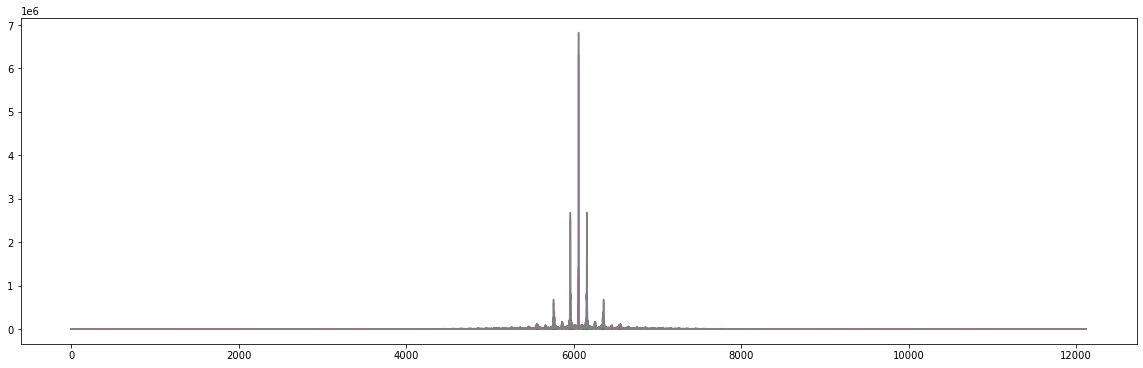

In [22]:
fl=0
for f in fp:
    
    plt.plot(np.abs(np.fft.fftshift(f)))
plt.show()

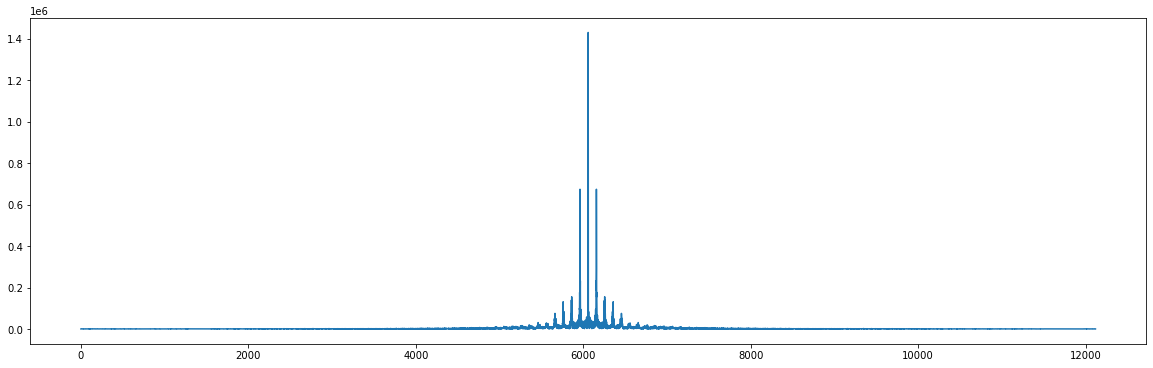

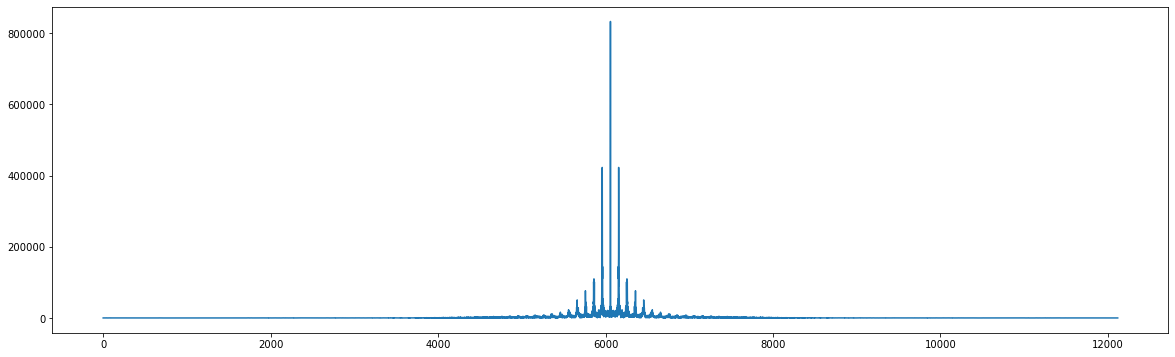

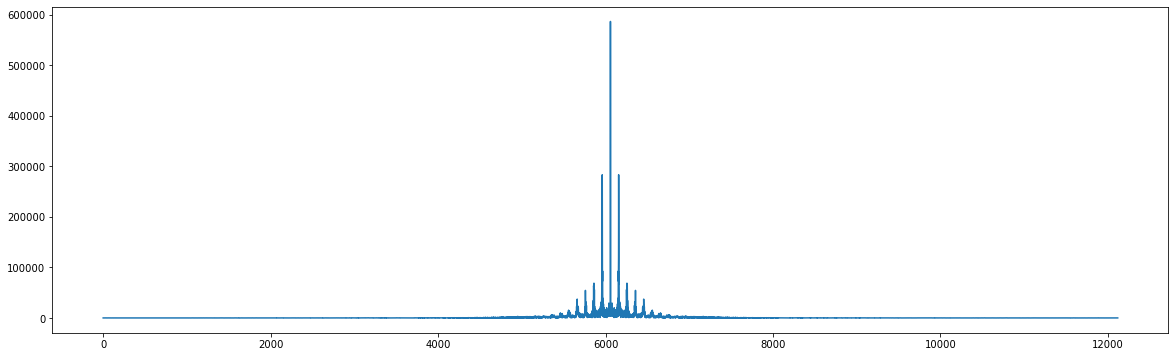

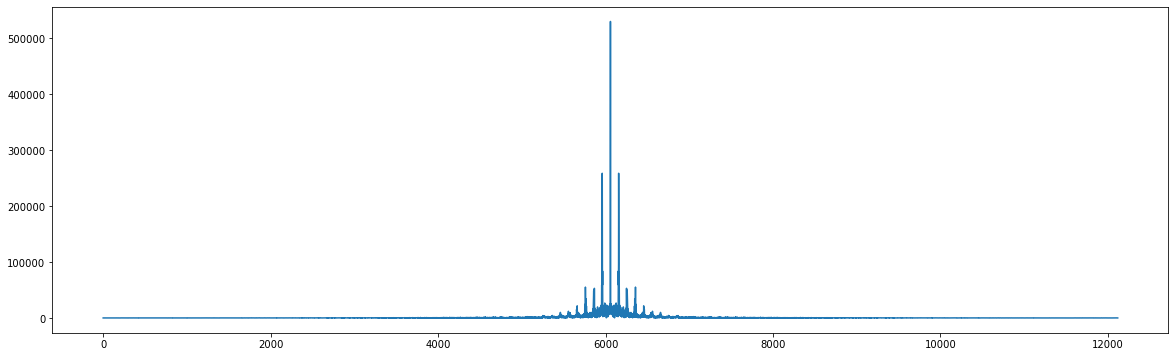

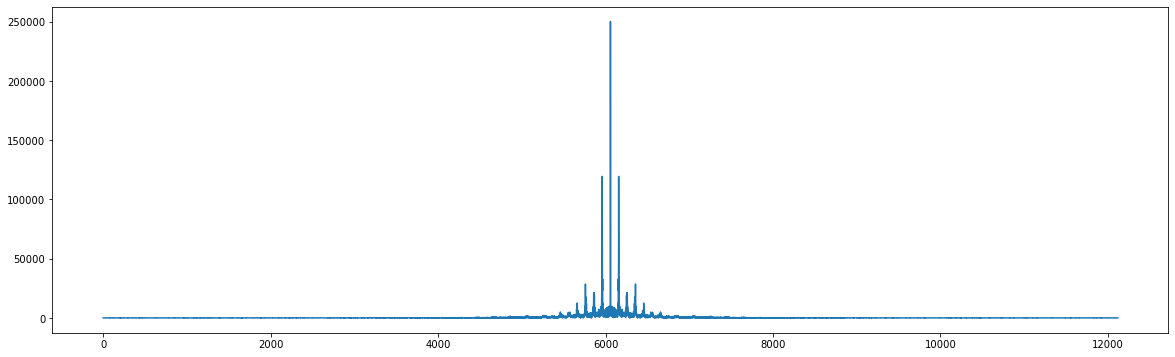

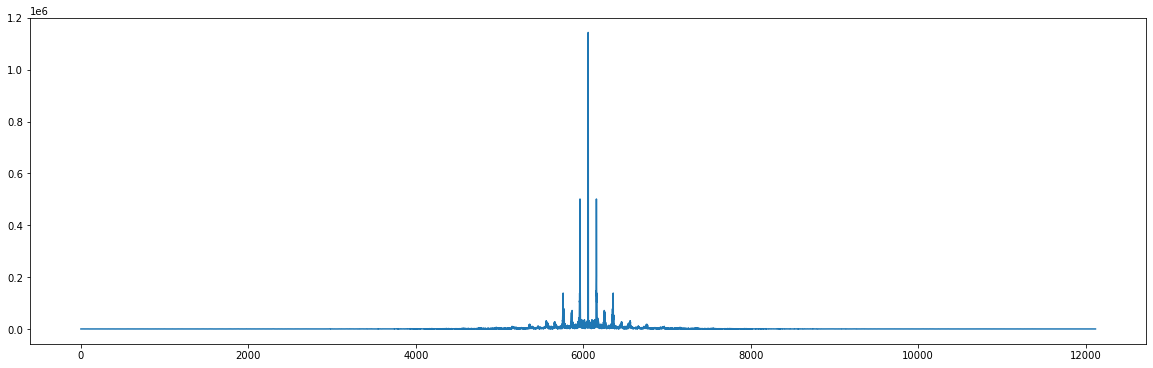

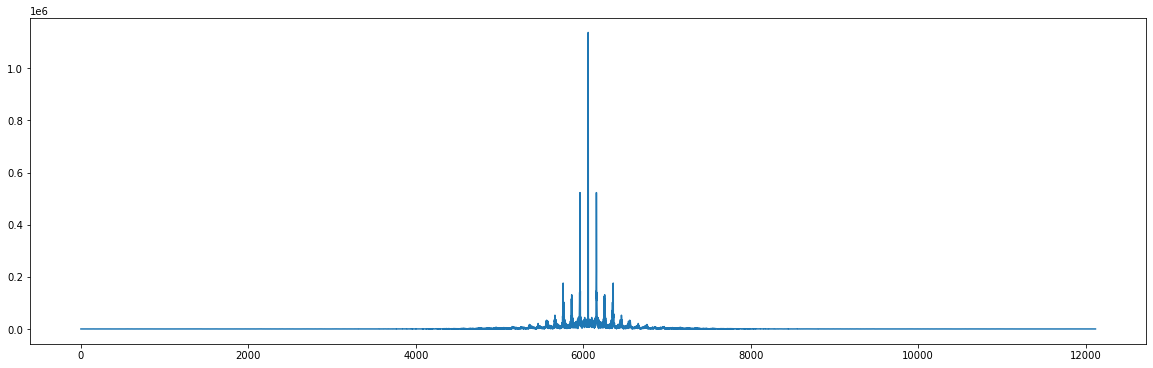

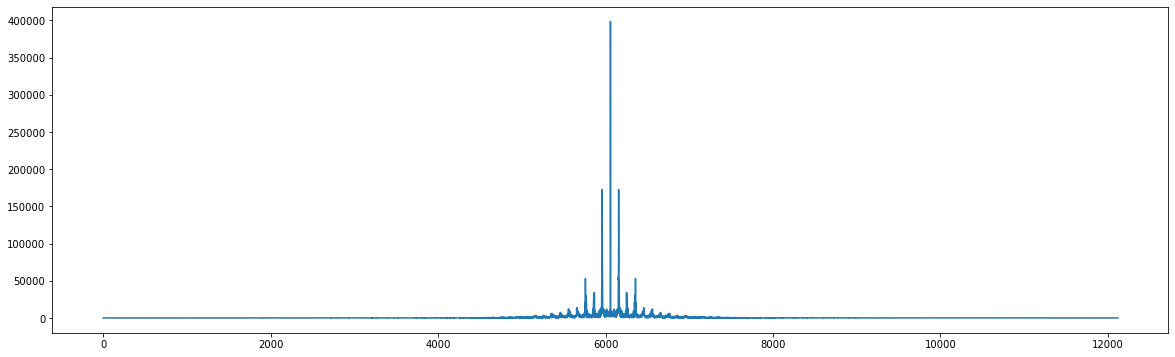

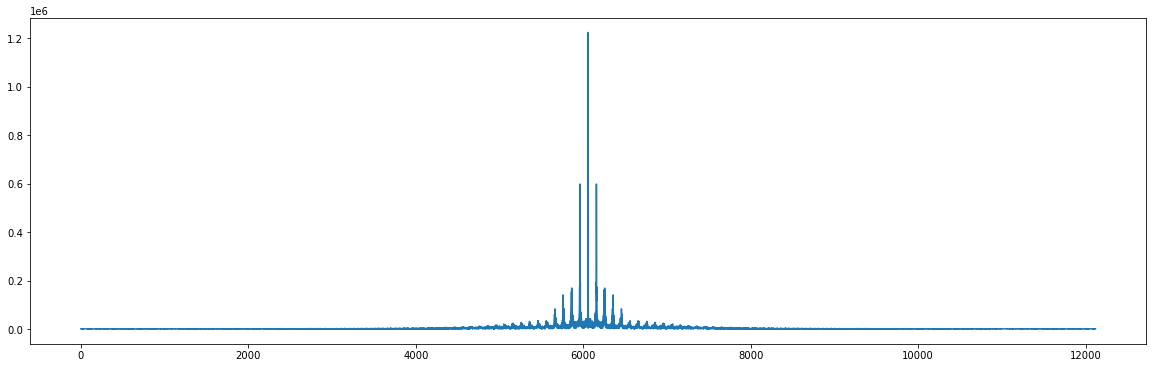

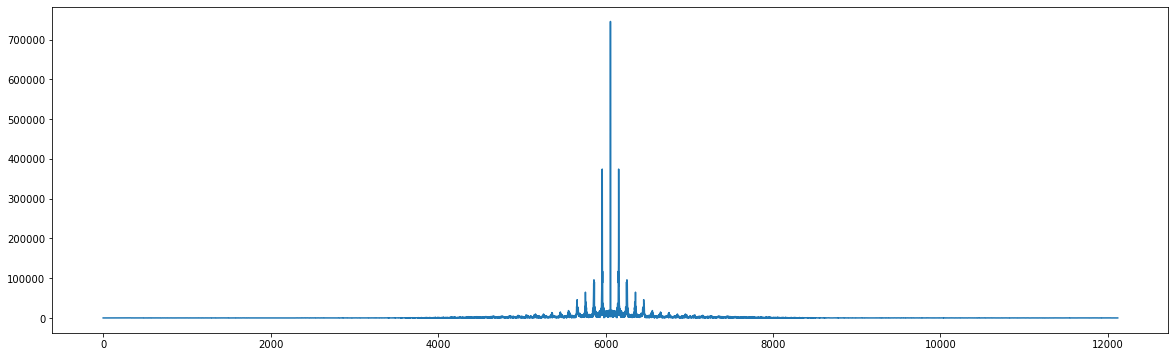

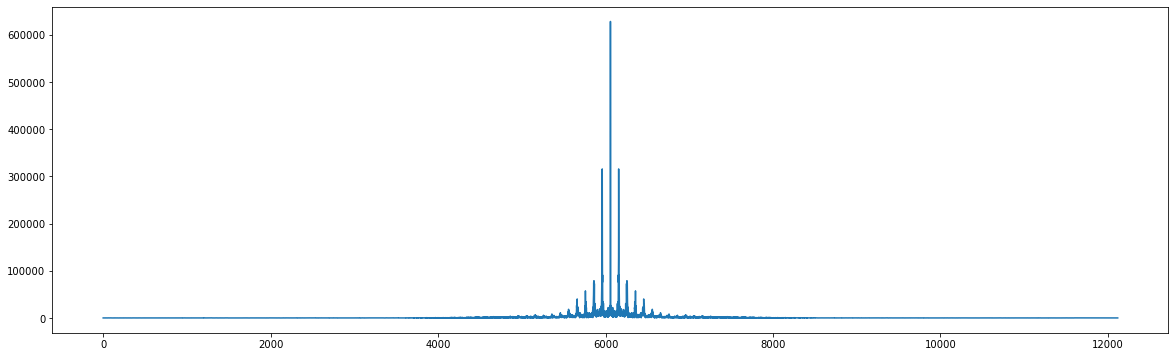

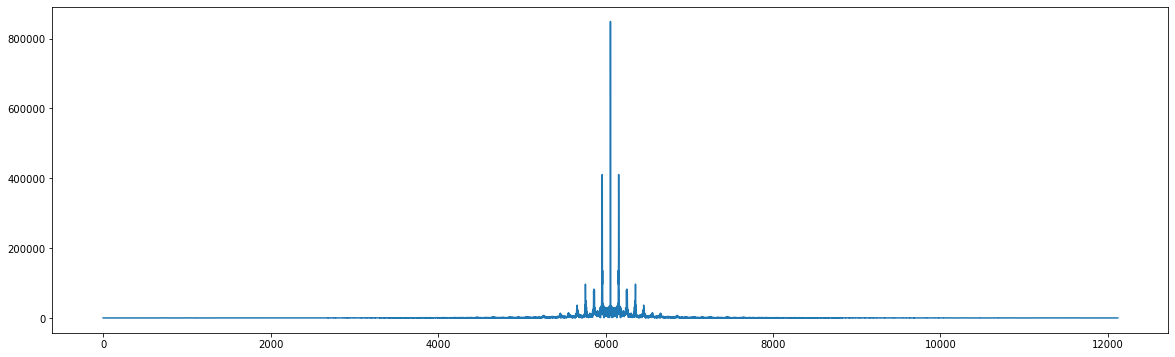

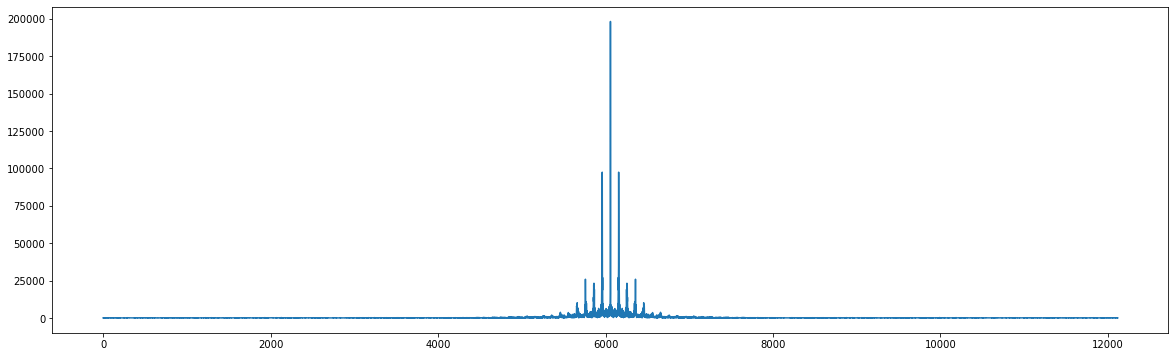

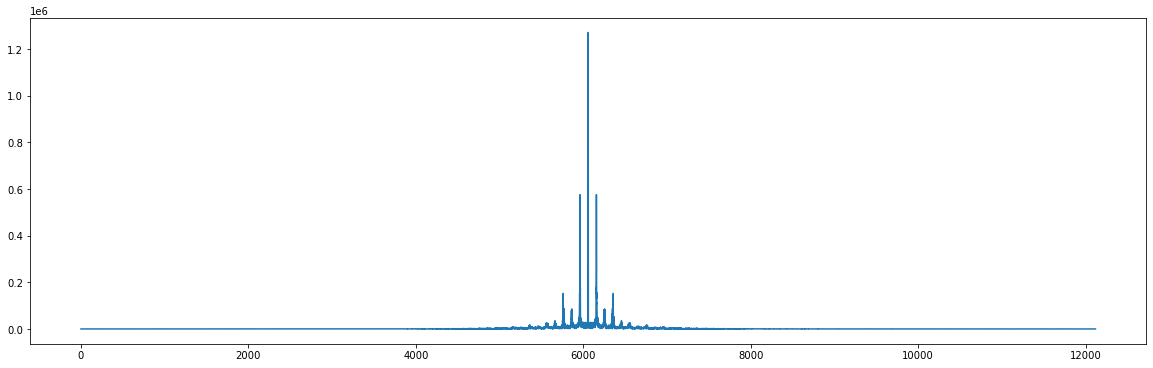

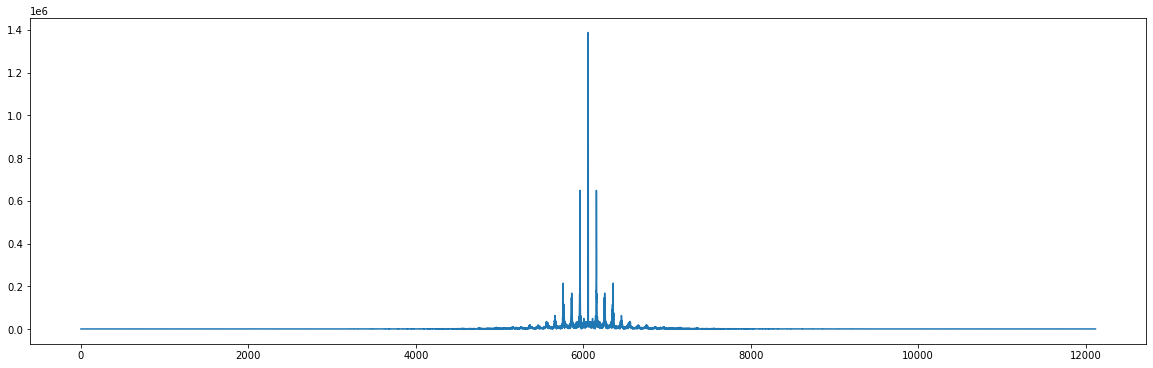

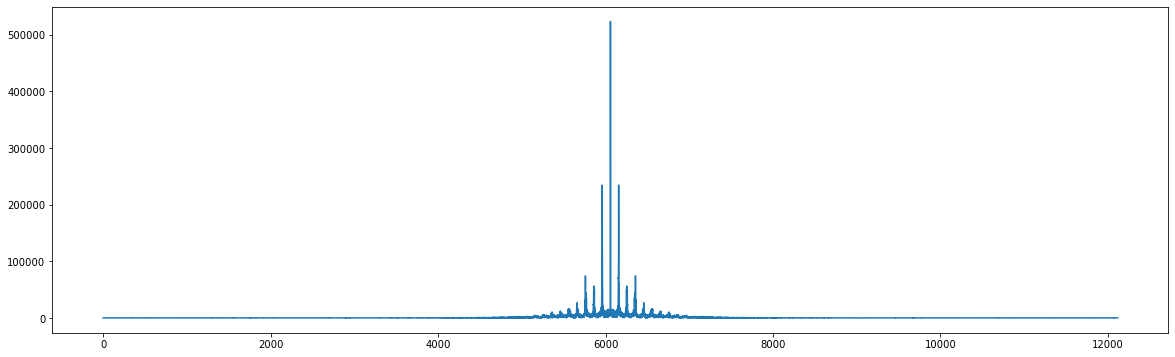

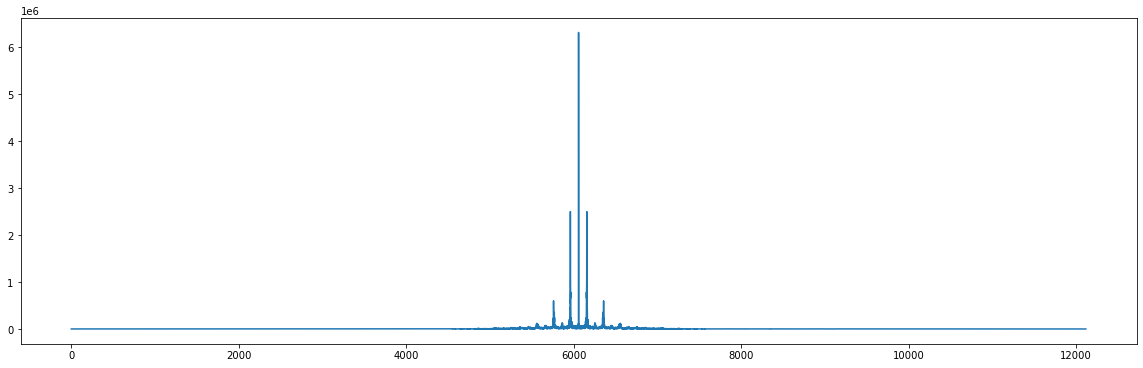

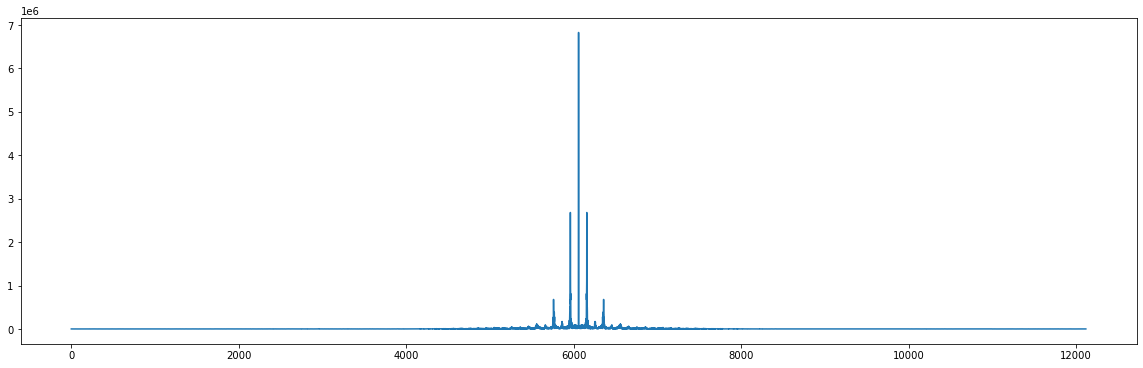

In [20]:
for f in fp:
    plt.plot(np.abs(np.fft.fftshift(f)))
    plt.show()